# Ceramics

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.vq import whiten #datu standartizēšanas funkcija
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram 
#linkage aprēķinās distances
#fcluster izveidos klasterus
#dendrogram uzzīmēs dendrogrammu
# from scipy.spatial.distance import pdist

# import sklearn.cluster
# from sklearn.cluster import AgglomerativeClustering
# import sklearn.metrics as sm

In [107]:
#read exel
df = pd.read_excel("Keramika_merijumi_jauninajumi.xlsx", 
                   sheet_name = 1)

In [173]:
df.head(1)

,Unnamed: 0,SiO2,Al2O3,Fe2O3,K2O,P2O5,MgO,MnO,CaO,Na2O,Cl,TiO,BaO,ZnO,SO3
0,AS4,56.39,18.08,8.15,5.3,1.22,3.56,0.0,3.21,2.42,0.13,0.86,0.23,0.08,0.25


In [174]:
df = pd.DataFrame(df)

print(df.head(2), type(df))

  Unnamed: 0   SiO2  Al2O3  Fe2O3   K2O   P2O5   MgO   MnO   CaO  Na2O    Cl  \
0        AS4  56.39  18.08   8.15  5.30   1.22  3.56  0.00  3.21  2.42  0.13   
1        AS5  37.70  13.45  13.56  6.28  11.76  3.93  0.06  9.66  0.84  0.18   

    TiO   BaO   ZnO   SO3  
0  0.86  0.23  0.08  0.25  
1  0.74  0.38  0.15  0.67   <class 'pandas.core.frame.DataFrame'>


In [252]:
df.describe()

# list(df.columns)

,SiO2,Al2O3,Fe2O3,K2O,P2O5,MgO,MnO,CaO,Na2O,Cl,TiO,BaO,ZnO,SO3
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.00000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,52.430462,16.423538,10.323692,5.244308,4.727538,2.67800,0.286308,4.787385,0.629846,0.103846,0.881692,0.210154,0.094308,0.363077
std,6.737546,3.262234,2.683848,0.872645,3.696142,0.72102,0.306587,4.155037,0.559909,0.090462,0.178689,0.090821,0.044615,0.289147
min,34.510000,10.550000,4.530000,3.050000,0.870000,1.19000,0.000000,0.000000,0.000000,0.000000,0.540000,0.050000,0.010000,0.000000
25%,48.510000,13.650000,8.950000,4.500000,1.690000,2.13000,0.060000,1.630000,0.310000,0.050000,0.770000,0.150000,0.060000,0.150000
50%,53.430000,16.730000,10.470000,5.300000,3.310000,2.65000,0.210000,3.430000,0.580000,0.080000,0.860000,0.200000,0.100000,0.290000
75%,56.730000,18.480000,11.820000,5.750000,6.920000,3.16000,0.370000,7.490000,0.810000,0.140000,0.980000,0.260000,0.120000,0.480000
max,66.200000,24.910000,18.960000,6.970000,15.690000,4.54000,1.480000,19.700000,3.480000,0.400000,1.560000,0.520000,0.260000,1.310000


In [111]:
#standartize values
df_w = whiten(df.loc[:,['SiO2','Al2O3','Fe2O3','K2O','P2O5','MgO','MnO','CaO','Na2O','Cl','TiO','BaO','ZnO','SO3']])

In [254]:
print(pd.DataFrame(df_w).describe(), type(df_w)) #Pārbaude vai pēcdatu standartizēšanas std ir vienāda ar 1

              0          1          2          3          4          5   \
count  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000   
mean    7.842393   5.073624   3.876536   6.056438   1.289000   3.743089   
std     1.007782   1.007782   1.007782   1.007782   1.007782   1.007782   
min     5.161904   3.259147   1.701011   3.522321   0.237212   1.663284   
25%     7.255982   4.216811   3.360716   5.196867   0.460792   2.977139   
50%     7.991901   5.168297   3.931475   6.120755   0.902497   3.703953   
75%     8.485506   5.708914   4.438398   6.640441   1.886792   4.416789   
max     9.902000   7.695295   7.119461   8.049370   4.278002   6.345640   

              6          7          8          9          10         11  \
count  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000   
mean    0.941122   1.161155   1.133662   1.156884   4.972616   2.331948   
std     1.007782   1.007782   1.007782   1.007782   1.007782   1.007782   
min     0.000000   0.000

In [258]:
df_w = pd.DataFrame(df_w)

# print(df_w, type(df_w))

## Visi kopā

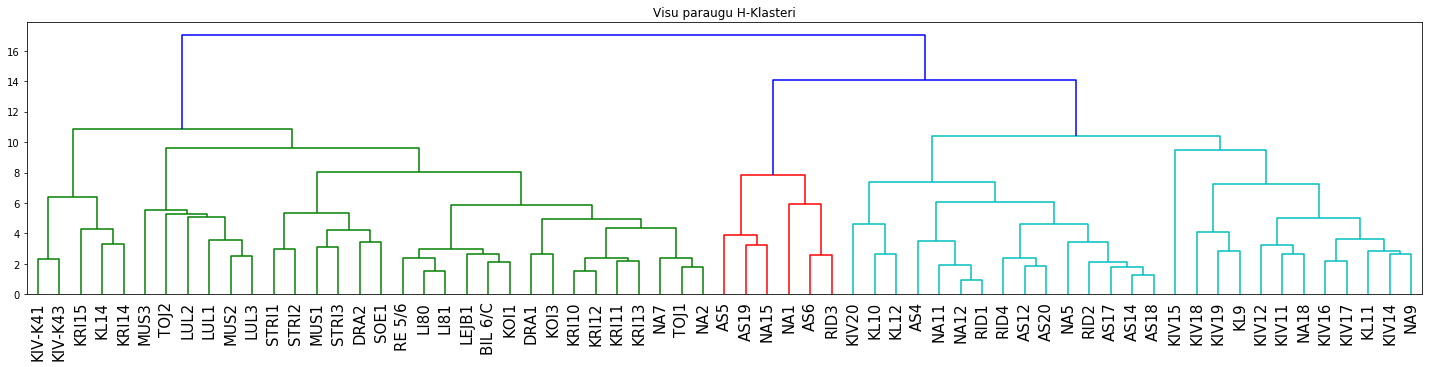

In [238]:
o = df.iloc[:,0] #atlasīta pirmā kolonna kur ir mērījumu nosaukumi
o = np.array(o) #pārvērsti mērijumi par np.array formātu

plt.figure(figsize=(25, 5))
plt.title('Visu paraugu H-Klasteri')
# plt.xlabel('sample index')
# plt.ylabel('distance')

Z = linkage(df_w, method = "ward", metric = "euclidean")

dn = dendrogram(Z, 
                labels = o, 
                leaf_font_size=15)


plt.show()

## Daugavas Lejtece

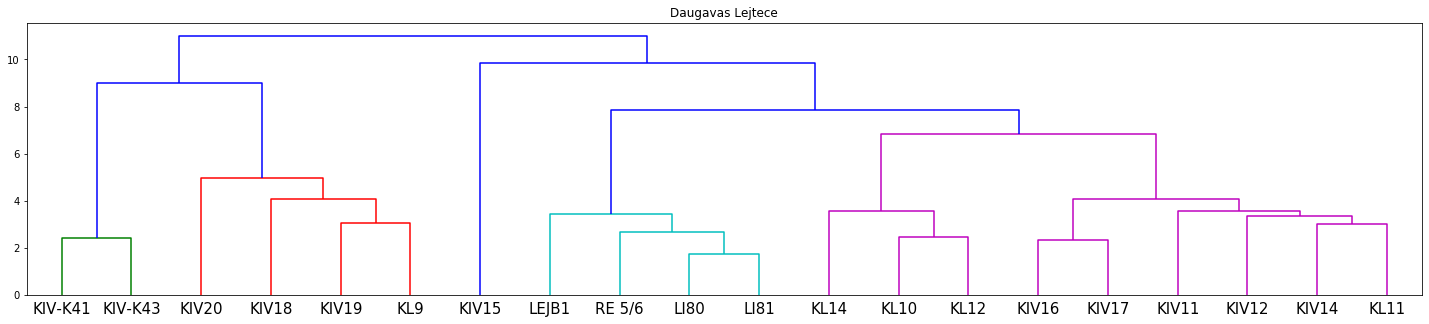

In [244]:
df_daug_lejt = pd.read_excel("Keramika_merijumi_jauninajumi.xlsx", 
                   sheet_name = 2)

list_daug_lejt = df_daug_lejt.iloc[:,0]
list_daug_lejt = np.array(list_daug_lejt)

df_w_daug_lejt = whiten(df_daug_lejt.loc[:,['SiO2','Al2O3','Fe2O3','K2O','P2O5','MgO','MnO','CaO','Na2O','Cl','TiO','BaO','ZnO','SO3']])

plt.figure(figsize=(25, 5))
plt.title('Daugavas Lejtece')
# plt.xlabel('sample index')
# plt.ylabel('distance')

Z_daug_lejt = linkage(df_w_daug_lejt, method = "ward", metric = "euclidean")

dn_daug_lejt = dendrogram(Z_daug_lejt,
                         labels = list_daug_lejt, 
                          leaf_font_size=15)

plt.show()

## Kurzeme

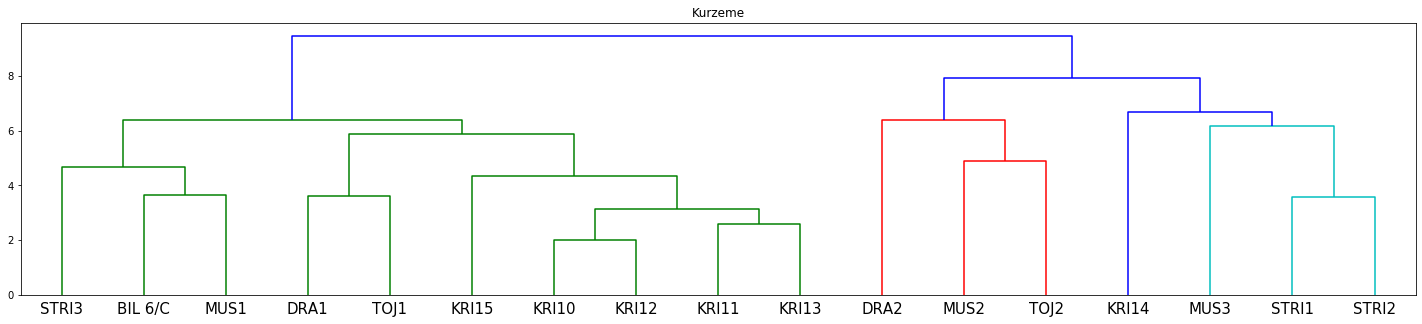

In [247]:
df_kurzeme = pd.read_excel("Keramika_merijumi_jauninajumi.xlsx", 
                   sheet_name = 3)

list_kurzeme = df_kurzeme.iloc[:,0]
list_kurzeme = np.array(list_kurzeme)

df_w_kurzeme = whiten(df_kurzeme.loc[:,['SiO2','Al2O3','Fe2O3','K2O','P2O5','MgO','MnO','CaO','Na2O','Cl','TiO','BaO','ZnO','SO3']])

plt.figure(figsize=(25, 5))
plt.title('Kurzeme')
# plt.xlabel('sample index')
# plt.ylabel('distance')

Z_kurzeme = linkage(df_w_kurzeme, method = "ward", metric = "euclidean")

dn_kurzeme = dendrogram(Z_kurzeme,
                        labels = list_kurzeme, 
                        leaf_font_size=15)

plt.show()

## EST_LV_LT

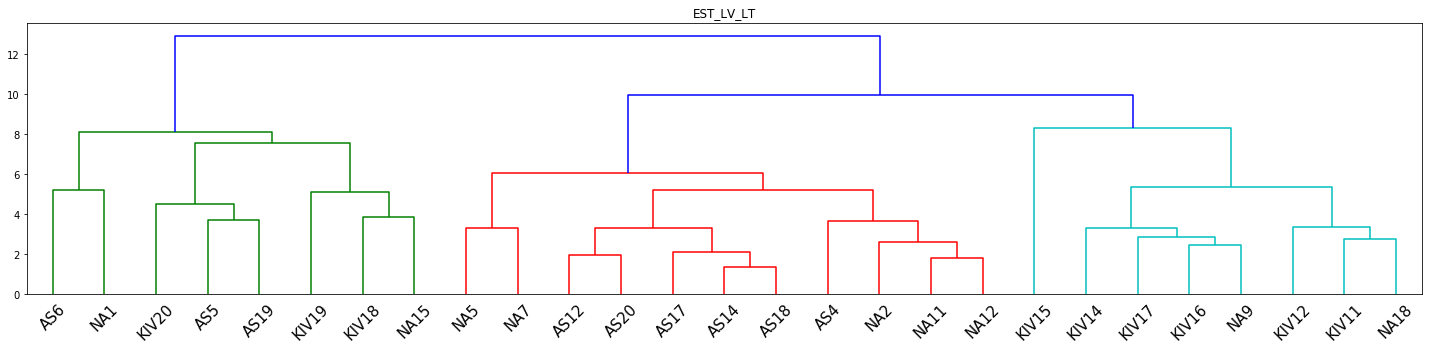

In [249]:
df_est_lv_lt = pd.read_excel("Keramika_merijumi_jauninajumi.xlsx", 
                   sheet_name = 4)

list_est_lv_lt = df_est_lv_lt.iloc[:,0]
list_est_lv_lt = np.array(list_est_lv_lt)

df_w_est_lv_lt = whiten(df_est_lv_lt.loc[:,['SiO2','Al2O3','Fe2O3','K2O','P2O5','MgO','MnO','CaO','Na2O','Cl','TiO','BaO','ZnO','SO3']])

plt.figure(figsize=(25, 5))
plt.title('EST_LV_LT')
# plt.xlabel('sample index')
# plt.ylabel('distance')

Z_est_lv_lt = linkage(df_w_est_lv_lt, method = "ward", metric = "euclidean")

dn_est_lv_lt = dendrogram(Z_est_lv_lt,
                         labels = list_est_lv_lt, 
                         leaf_font_size=15)

plt.show()

## Igaunija

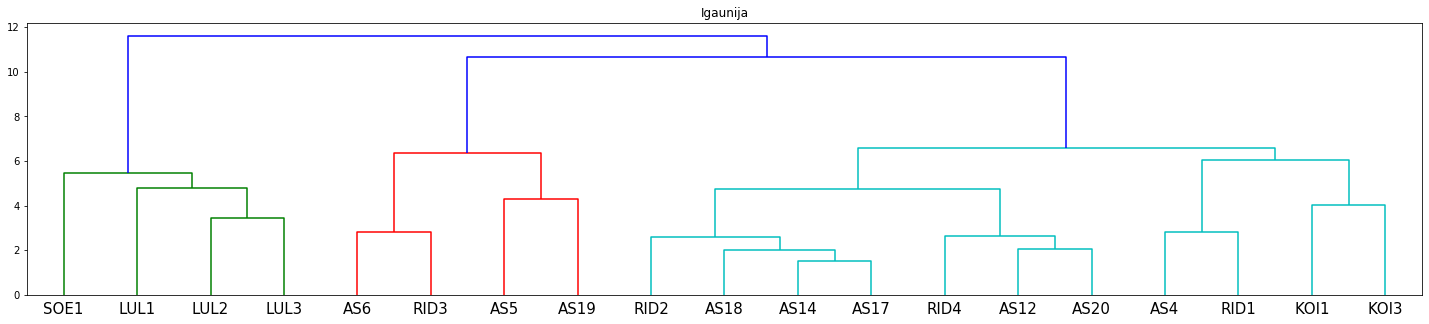

In [250]:
df_igaunija = pd.read_excel("Keramika_merijumi_jauninajumi.xlsx", 
                   sheet_name = 5)

list_igaunija = df_igaunija.iloc[:,0]
list_igaunija = np.array(list_igaunija)

df_w_igaunija = whiten(df_igaunija.loc[:,['SiO2','Al2O3','Fe2O3','K2O','P2O5','MgO','MnO','CaO','Na2O','Cl','TiO','BaO','ZnO','SO3']])

plt.figure(figsize=(25, 5))
plt.title('Igaunija')
# plt.xlabel('sample index')
# plt.ylabel('distance')

Z_igaunija = linkage(df_w_igaunija, method = "ward", metric = "euclidean")

dn_igaunija = dendrogram(Z_igaunija,
                         labels = list_igaunija, 
                         leaf_font_size=15)

plt.show()

## Velna Laivas

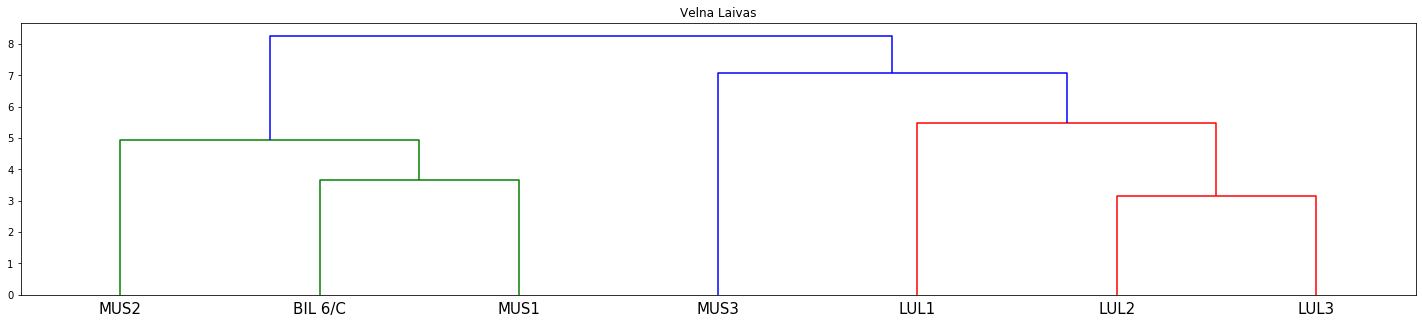

In [251]:
df_velna_laivas = pd.read_excel("Keramika_merijumi_jauninajumi.xlsx", 
                   sheet_name = 6)

list_velna_laivas = df_velna_laivas.iloc[:,0]
list_velna_laivas = np.array(list_velna_laivas)

df_w_velna_laivas = whiten(df_velna_laivas.loc[:,['SiO2','Al2O3','Fe2O3','K2O','P2O5','MgO','MnO','CaO','Na2O','Cl','TiO','BaO','ZnO','SO3']])

plt.figure(figsize=(25, 5))
plt.title('Velna Laivas')
# plt.xlabel('sample index')
# plt.ylabel('distance')

Z_velna_laivas = linkage(df_w_velna_laivas, method = "ward", metric = "euclidean")

dn_velna_laivas = dendrogram(Z_velna_laivas,
                             labels = list_velna_laivas, 
                             leaf_font_size=15)

plt.show()

### Metožu salīdzinājums pie visiem paraugiem

Note: Es pagaidām noņēmu šīm funkcijām output, bet nu pēc nevienām citām klasteru metodēm neas jēdzīgs negrupējās.

In [ ]:
Z1 = linkage(df_w, method = "centroid", metric = "euclidean")
dn = dendrogram(Z1)
plt.show()

In [ ]:
Z2 = linkage(df_w, method = "median", metric = "euclidean")
dn = dendrogram(Z2)
plt.show()

In [ ]:
Z3 = linkage(df_w, method = "single", metric = "euclidean")
dn = dendrogram(Z3)
plt.show()

In [ ]:
Z4 = linkage(df_w, method = "complete", metric = "euclidean")
dn = dendrogram(Z4)
plt.show()

In [ ]:
Z5 = linkage(df_w, method = "average", metric = "euclidean")
dn = dendrogram(Z5)
plt.show()

In [ ]:
Z6 = linkage(df_w, method = "weighted", metric = "euclidean")
dn = dendrogram(Z6)
plt.show()

### Misc

In [ ]:
#Kods priekš tā lai noteiktu kura klasteru metode visprecīzāk iedala mērījumus, ja mums jau iepriekš būtu zināms iedalījums.
#Reference: https://youtu.be/JcfIeaGzF8A

# k = 2
# Hclustering = AgglomerativeClustering(n_clusters = k, affinity = "euclidean", linkage = "ward")

# Hclustering.fit(df_w[[0,1]])
# sm.accuracy_score(y, Hclustering.labels_)